## Описание данных:
**Name** — название игры  
**Platform** — платформа   
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10) Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Данные за 2016 год могут быть неполными.

___

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [10]:
df = pd.read_csv('/Users/nonadoinjashvili/Desktop/DA/data/games.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Столбцы необходимо привести к нижнему регистру.

In [13]:
df.duplicated().sum()

0

Явных дубликатов нет.

In [14]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

1) Пропуски в Name и Year_of_Release можем удалить, в виду незначительного количества записей.  
2) Пропуски в Critic_Score и User_Score заполнять не будем, так как любое заполнение исказит результаты стат-тестов.  
3) Пропуски в rating заполним значением 'unknown', так как переменная категориальная.

___

## Шаг 2. Готовим данные для анализа

In [15]:
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.1 обратавываем пропуски

In [17]:
df = df.dropna(subset=['name','year_of_release'])
df['rating'] = df['rating'].fillna('unknown')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Обработали пропуски, исходя из выводов, сделанных после промотра данных.

In [18]:
df = df.replace('tbd', 'nan')

Заменяем tиd на nan для обеспечения однородности данных.

### 2.2 Изменяем типы данных

In [19]:
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### 2.3 Добавляем столбец с суммарными продажами

In [20]:
df['total_region_sales'] =  df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Добавили столбец с суммой продаж по всем регионам.

___

# Шаг 3. Проводим исследовательский анализ данных

### 3.1 Посмотрим на динамику выпуска игр в разные годы

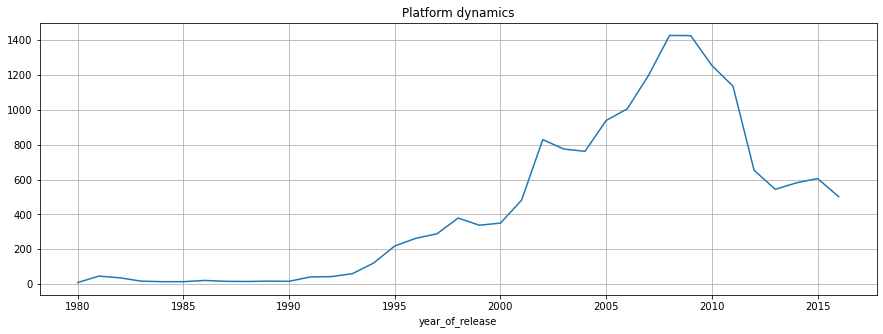

In [26]:
df.groupby('year_of_release')['name']\
.count()\
.plot(grid=True, figsize=(15,5))
plt.title('Platform dynamics')

plt.show()

Пик в районе 2008-2009 годов. Возьмём данные за  период после 2012 года, так как игровая индустрия динамично меняется из года в год и более старые данные не помогут в анализе.

### 3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. Выберем актуальный срок для анализа.

In [28]:
top_platforms = df.groupby('platform')['total_region_sales'].sum()\
.sort_values(ascending=False)\
.head(10)

top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_region_sales, dtype: float64

Выбрали ТОП 10 платформы с наибольшими суммарными продажами.

In [31]:
df_year = df.query('year_of_release > 2012')

Сделали срез не старее 2013 года. Возьмём данные за актуальный период после 2012 года, так как игровая индустрия динамично меняется из года в год.

In [41]:
platforms_pivot = df_year\
.pivot_table(index = 'year_of_release', values = 'total_region_sales', columns = 'platform', aggfunc = 'sum')

platforms_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


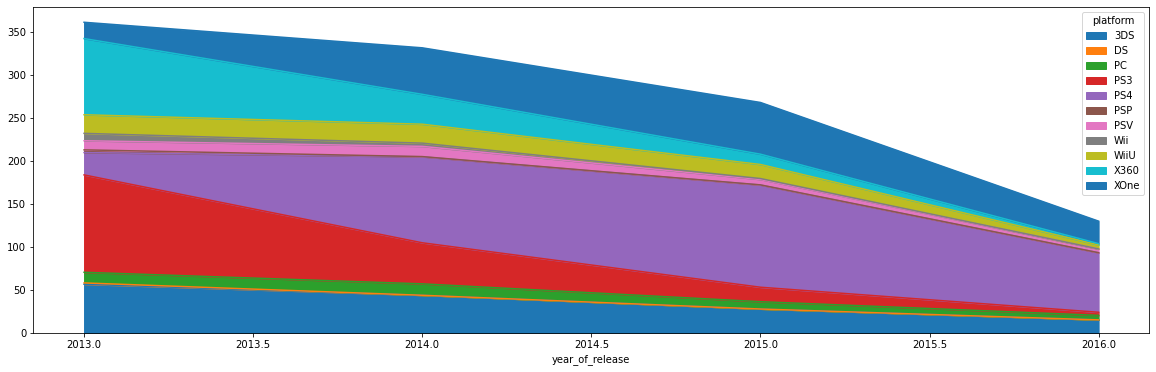

In [45]:
platforms_pivot.plot.area(figsize=(20, 6))

plt.show()

Наиболее перспективные платформы исходя из площади областей графика и актуальности по годам: Wii, XOne, PS4, X360, 3DS.

In [46]:
top_5 = ['WiiU', 'XOne', 'PS4', 'X360', '3DS']
new_top = df_year.query('platform in @top_5')

Сформировали новый топ-5 из топ-10. Связи из топовых по продажам, перспективные исходя из графика.

### 3.3 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(-0.2, 25.0)

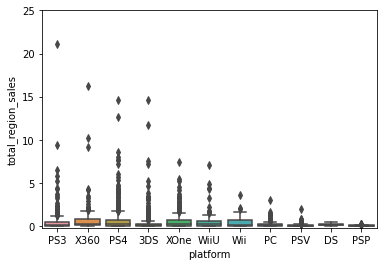

In [47]:
sns.boxplot(x="platform", y="total_region_sales", data = df_year)
plt.ylim(-0.2, 25)

(-0.2, 2.0)

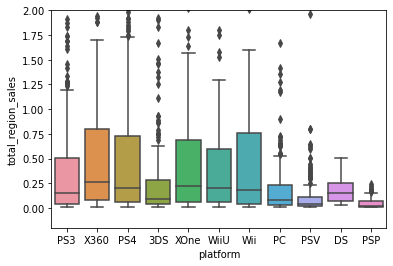

In [48]:
sns.boxplot(x="platform", y="total_region_sales", data = df_year)
plt.ylim(-0.2, 2)

Построили ящики с усами по платформам. Наибольшие показатели медианного значения наблюдаются у XOne и X360, так же на хорошем уровне PS3, PS4 и WiiU. Это говорит нам о стальности платформ на рынке.

In [50]:
df_PS4 = new_top.query('platform == "PS4"')
df_PS4 = df_PS4[['critic_score', 'user_score', 'total_region_sales']]

Берём PS4 в первую очередь, так как на графике выше наибольшая область закрашенная ближе к 2016 года именно за этой платформой.

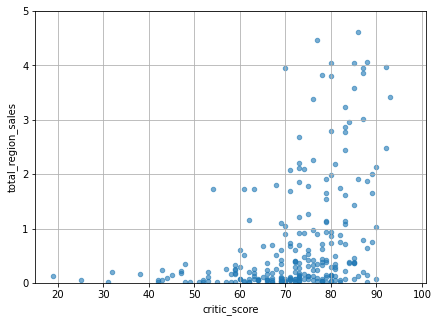

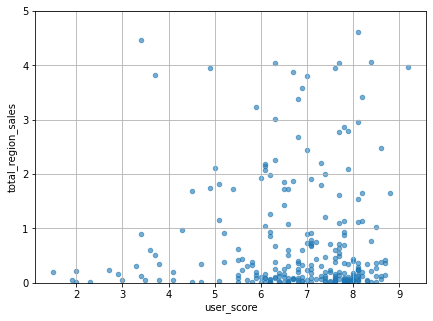

In [51]:
df_PS4.plot( x='critic_score', y='total_region_sales', ylim=(0, 5),  kind='scatter', figsize=(7,5), grid=True, alpha=0.6)
df_PS4.plot( x='user_score', y='total_region_sales', ylim=(0, 5), kind='scatter', figsize=(7,5), grid=True, alpha=0.6)

plt.show()

In [25]:
df_PS4.corr().round(2)

,critic_score,user_score,total_region_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_region_sales,0.41,-0.03,1.00


Корреляция с оценками более ярко выражена по платформам: X360 и PS3. Однако, даже в случае с этими платформами она не является существенно влияющей на продажи. Так же, прослеживается заметная корреляция оценок между собой.

### 3.4 Посмотрим на общее распределение игр по жанрам

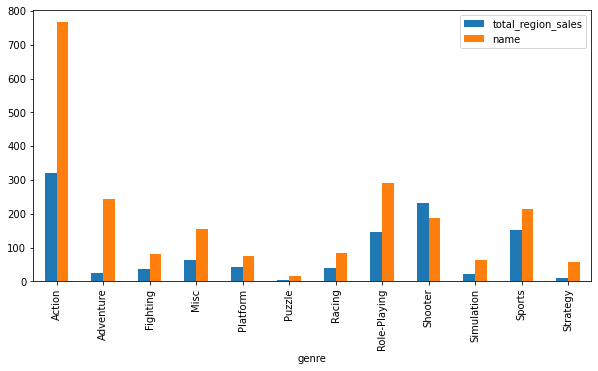

In [54]:
df_year.groupby(['genre'])\
.agg({'total_region_sales':'sum', 'name':'count'})\
.plot(kind='bar', figsize=(10,5))

plt.show()

In [56]:
df_year.pivot_table(index = 'genre', values = 'total_region_sales', aggfunc = 'median')\
. sort_values(by='total_region_sales', ascending=False)

,total_region_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


(-0.2, 25.0)

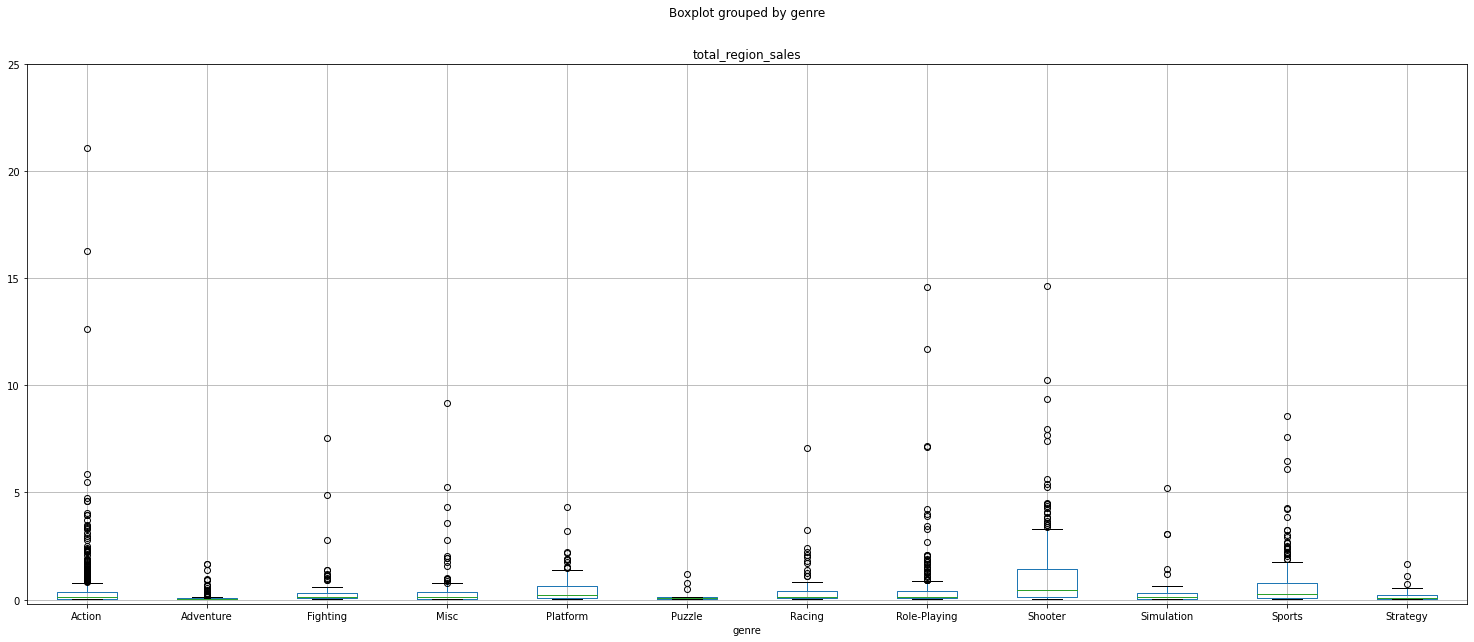

In [57]:
df_year.boxplot(by='genre', column='total_region_sales', figsize=(25,10))
plt.ylim(-0.2, 25)

(-0.2, 4.0)

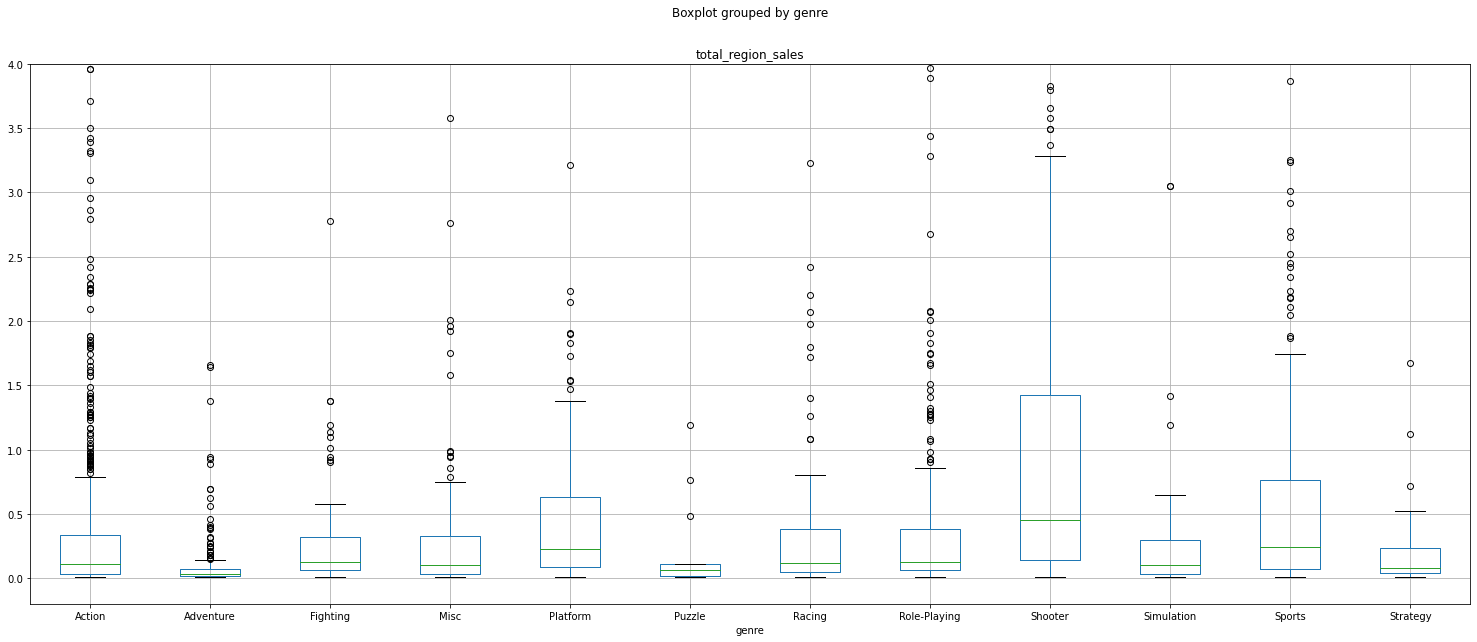

In [58]:
df_year.boxplot(by='genre', column='total_region_sales', figsize=(25,10))
plt.ylim(-0.2, 4)

По результатам построения столбчатой диаграммы и диаграммы размаха, мы видим наблюдаем наиболее высокий медианный показатель у жанра - "Shooter". Из этого мы можем сделать вывод об устрочивом спросе на игры данного жанра. При этом наибольшие продажи по играм жанра - "Action", но соотношение по количеству выпущенных игр и продаж (примерно 2:1) говорит не в пользу данного жанра. Другими словами, в этом жанре выпускалось много игр, но выстреливали по продажам лишь немногие по соотношению с "Shooter". Об этом так же говорят и выбросы. На 3-ем и 4-ом месте по продажам "Sports" и "RPG", которые так же выходят на высокие показатели продаж при высоком показателе выпускаемых игр, как и "Action".

# Шаг 4. Составим портрет пользователя каждого региона

In [59]:
new_top.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_region_sales'],
      dtype='object')

### 4.1 Самые популярные платформы (топ-5)

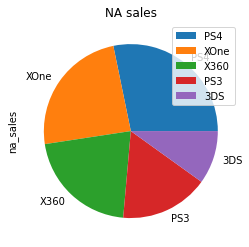

In [76]:
df_year.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='pie', subplots=True)
plt.title('NA sales')

plt.show()

По продажам в северной Америке лидирует PS4, на втором - XOne и на третьем - X360.

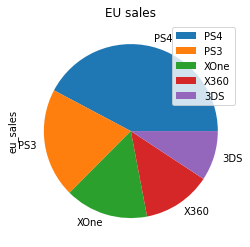

In [77]:
df_year.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='pie', subplots=True)
plt.title('EU sales')

plt.show()

В Европе уже с большим отрывом лидирует PS4.

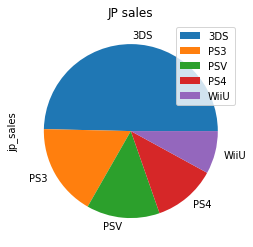

In [78]:
df_year.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='pie', subplots=True)
plt.title('JP sales')

plt.show()

В Японии принципиально другая расстановка сил и на первое место выходит 3DS.

### 4.2 Самые популярные жанры (топ-5)

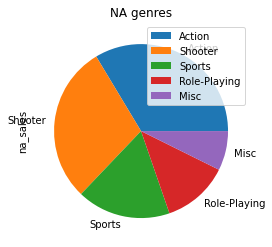

In [79]:
df_year.groupby(['genre']).agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending=False).head(5).\
plot(kind='pie', subplots=True)
plt.title('NA genres')

plt.show()

В Америке приоритет отдаётся жанрам: Action и Shooter.

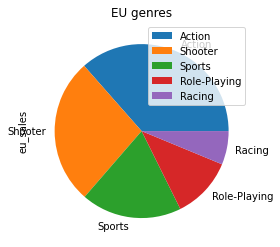

In [80]:
df_year.groupby(['genre']).agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='pie', subplots=True)
plt.title('EU genres')

plt.show()

Показатели в Европе практически повторяют Американские и тройка лидеров не изменилась.

Text(0.5, 1.0, 'JP genres')

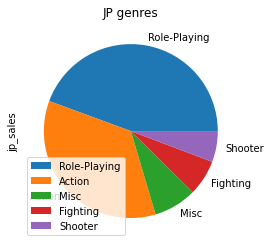

In [66]:
df_year.groupby(['genre']).agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='pie', subplots=True)
plt.title('JP genres')

plt.show()

В Японии совсем другая картина. Думаю, что это связано с менталитетом. RPG для более уидчивых и готовых к постепенному развитию событий, в отличие от экшена.

### 4.3 Оценим влияние рейтинга ESRB на продажи в отдельном регионе

In [50]:
df_year.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
2,M,165.21
4,unknown,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


Лидируют игры с рейтингом Е и М

In [51]:
df_year.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
2,M,145.32
0,E,83.36
4,unknown,78.91
1,E10+,42.69
3,T,41.95


Как и в Америке, лидируют игры с рейтингом Е и М

In [52]:
df_year.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
4,unknown,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


Япония отличилась и здесь, видимо они не обращают особого внимания на рейтинги. Категория Е всё же на втором месте.

# Шаг 5. Проверим гипотезы

### 5.1  
**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC разные.

In [68]:
df_xbox = df_year.query('platform == "XOne"')['user_score'].dropna().to_list()
df_pc = df_year.query('platform == "PC"')['user_score'].dropna().to_list()

In [69]:
alpha = .05
results = st.ttest_ind(df_xbox, df_pc, equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("отвергаем нулевую гипотезу")
else:
    print("не отвергаем нулевую гипотезу")

0.14759594013430463
не отвергаем нулевую гипотезу


### 5.2  
**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.  
**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [72]:
df_action = df_year.query('genre == "Action"')['user_score'].dropna().to_list()
df_sports = df_year.query('genre == "Sports"')['user_score'].dropna().to_list()

In [73]:
alpha = .05
results = st.ttest_ind(df_action, df_sports, equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("отвергаем нулевую гипотезу")
else:
    print("не отвергаем нулевую гипотезу")

1.4460039700704315e-20
отвергаем нулевую гипотезу


Выбрали Т-критерий стьюдента, потому что он подходит для сравнения средних значений.

# Шаг 6. Общий вывод

1. Среди платформ наиболее перспективными мы можем выделить следующие: WiiU', XOne, PS4, X360 и 3DS. При этом в Америке и Европе PS4 и XOne станут наиболее интересными для инвестиций, а в Японии акцент лучше сделать на явного лидера - платформу 3DS.  
2. С точки зрения выбора жанра для продвижения, наиболее стабильным спросом пользуется "Shooter".  При этом наибольшие объёмы продаж по играм жанра - "Action", но больший риск не попасть в игру, которая выстрелит и на неё не будет большого спроса. Так же важно учитывать, что в Action и Shooter наиболее популярны в Америке и Европе, а Японцам больше по душе RPG